In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr
import geopandas as gpd

import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5)

# Get data and set working directory
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

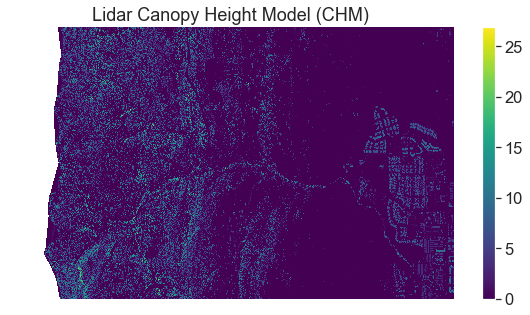

In [2]:
lidar_chm_path = os.path.join(
    "colorado-flood",
    "spatial"
    "boulder-leehill-rd",
    "outputs",
    "lidar_chm.tif"
)

lidar_chm_im = rxr.open_rasterio(
    "colorado-flood/spatial/boulder-leehill-rd/outputs/lidar_chm.tif",
    masked=True
).squeeze()

f, ax = plt.subplots(figsize=(10, 5))
lidar_chm_im.plot.imshow()
ax.set(title="Lidar Canopy Height Model (CHM)")

ax.set_axis_off()
plt.show()


In [3]:
aoi = os.path.join(
    "colorado-flood",
    "spatial",
    "boulder-leehill-rd",
    "clip-extent.shp"
)
# Open crop extent (your study area extent boundary)
crop_extent = gpd.read_file(aoi)


In [4]:
print('crop extent crs: ', crop_extent.crs)
print('lidar crs: ', lidar_chm_im.rio.crs)

crop extent crs:  epsg:32613
lidar crs:  EPSG:32613


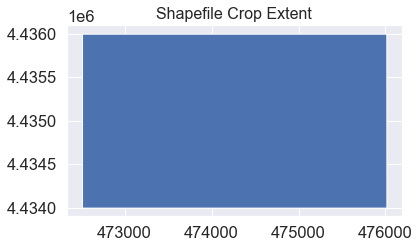

In [5]:
# Plot the crop boundary layer
# Note this is just an example so you can see what it looks like
# You don't need to plot this layer in your homework!
fig, ax = plt.subplots(figsize=(6, 6))

crop_extent.plot(ax=ax)

ax.set_title(
    "Shapefile Crop Extent",
    fontsize=16
)
plt.show()


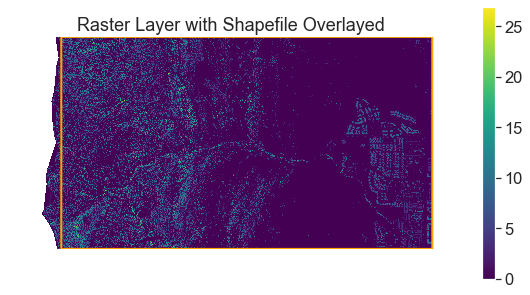

In [7]:
f, ax = plt.subplots(figsize=(10, 5))
lidar_chm_im.plot.imshow(ax=ax)

crop_extent.plot(
    ax=ax,
    color='None',
    edgecolor="orange",
    linewidth=2,
)
ax.set(title="Raster Layer with Shapefile Overlayed")

ax.set_axis_off()
plt.show()


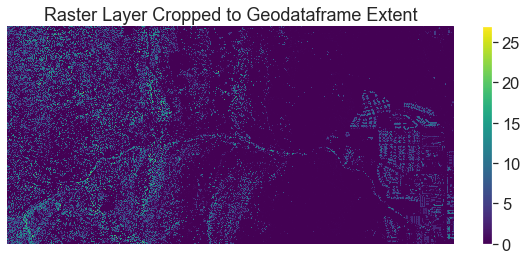

In [8]:
lidar_clipped = lidar_chm_im.rio.clip(
    crop_extent.geometry.apply(mapping),
    # This is needed if your GDF is in a diff CRS than the raster data
    crop_extent.crs
)

f, ax = plt.subplots(figsize=(10, 4))
lidar_clipped.plot(ax=ax)
ax.set(title="Raster Layer Cropped to Geodataframe Extent")
ax.set_axis_off()
plt.show()
